# Лабораторна робота No6
## Застосування numpy
### ФБ-21 Худоба Арсен
<b> Мета роботи:</b> отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та
градієнтного спуску.
### Завдання 1
1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = k + b) для подальшого аналізу результатів.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

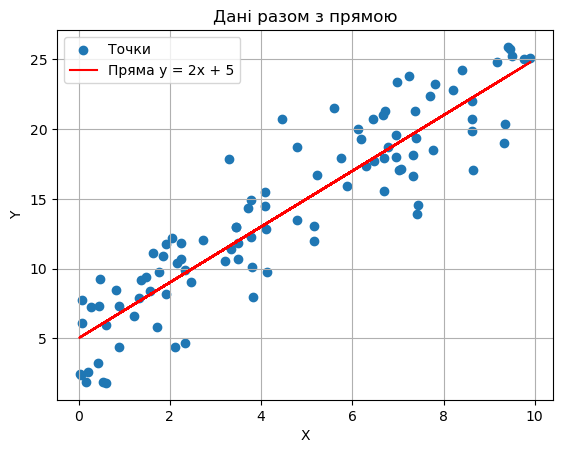

In [28]:
k = 2  
b = 5  

num_points = 100

x = np.random.uniform(0, 10, num_points)

noise = np.random.normal(0, 3, num_points)

y = k * x + b + noise

plt.scatter(x, y, label='Точки')
plt.plot(x, k * x + b, color='red', label='Пряма y = {}x + {}'.format(k, b))
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Дані разом з прямою')
plt.legend()
plt.grid(True)
plt.show()


2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок $\hat{k}$ та $\hat{b}$.
3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).


In [29]:
def least_squares_method(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    mean_xy = np.mean(x * y)
    mean_xx = np.mean(x * x)
    
    k_hat = (mean_xy - mean_x * mean_y) / (mean_xx - mean_x ** 2)
    b_hat = (mean_y - k_hat * mean_x)
    
    return k_hat, b_hat

k_hat, b_hat = least_squares_method(x, y)

k_np_polyfit, b_np_polyfit = np.polyfit(x, y, 1)

print("Параметри справжньої прямої:")
print("k =", k)
print("b =", b)
print()
print("Оцінки параметрів за методом найменших квадратів:")
print("k_hat =", k_hat)
print("b_hat =", b_hat)
print()
print("Оцінки параметрів за np.polyfit:")
print("k_np_polyfit =", k_np_polyfit)
print("b_np_polyfit =", b_np_polyfit)

Параметри справжньої прямої:
k = 2
b = 5

Оцінки параметрів за методом найменших квадратів:
k_hat = 2.0045748207202663
b_hat = 5.015281476509031

Оцінки параметрів за np.polyfit:
k_np_polyfit = 2.004574820720268
b_np_polyfit = 5.015281476509026


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

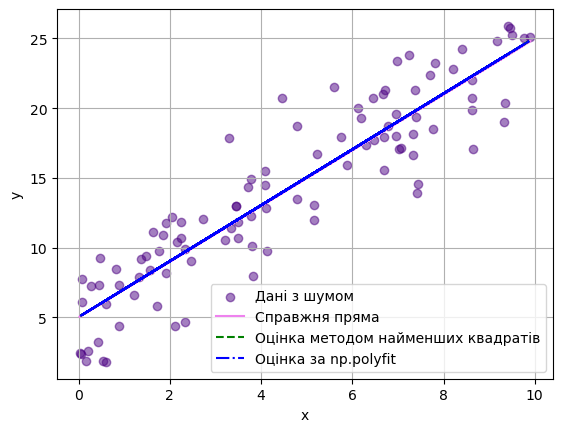

In [30]:
plt.scatter(x, y, label='Дані з шумом', color='indigo', alpha=0.5)
plt.plot(x, k * x + b, color='violet', label='Справжня пряма')
plt.plot(x, k_hat * x + b_hat, color='green', linestyle='--', label='Оцінка методом найменших квадратів')
plt.plot(x, k_np_polyfit * x + b_np_polyfit, color='blue', linestyle='-.', label='Оцінка за np.polyfit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Завдання 2
1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок $\hat{k}$ та $\hat{b}$. Визначіть оптимальні вхідні параметри: learning_rate, n_iter


In [33]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    k_hat = 0
    b_hat = 0
    n = len(x)
    
    for _ in range(n_iter):
        d_k = (-2/n) * np.sum(x * (y - (k_hat*x + b_hat)))
        d_b = (-2/n) * np.sum(y - (k_hat*x + b_hat))
        
        k_hat = k_hat - learning_rate * d_k
        b_hat = b_hat - learning_rate * d_b
    
    return k_hat, b_hat

k_hat, b_hat = gradient_descent(x, y)
print("Оцінки параметрів за методом градієнтного спуску:")
print("k_hat =", k_hat)
print("b_hat =", b_hat)


Оцінки параметрів за методом градієнтного спуску:
k_hat = 2.0065561844982156
b_hat = 5.002582001963767


2. Додайте отриману лінію регресії на загальний графік

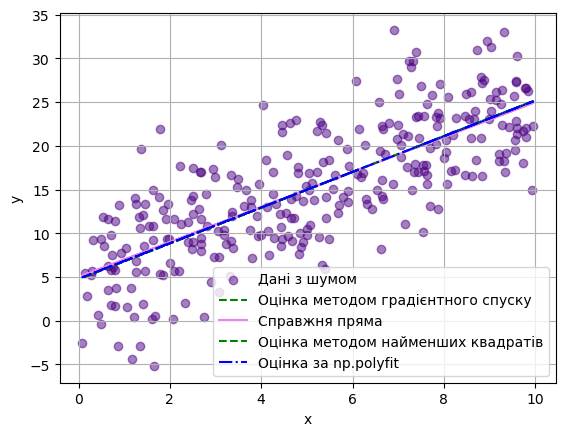

In [26]:
# Відображення даних
plt.scatter(x, y, label='Дані з шумом', color='indigo', alpha=0.5)

# Відображення оцінки лінії регресії за методом градієнтного спуску
plt.plot(x, k_hat * x + b_hat, color='green', linestyle='--', label='Оцінка методом градієнтного спуску')
plt.plot(x, k * x + b, color='violet', label='Справжня пряма')
plt.plot(x, k_hat * x + b_hat, color='green', linestyle='--', label='Оцінка методом найменших квадратів')
plt.plot(x, k_np_polyfit * x + b_np_polyfit, color='blue', linestyle='-.', label='Оцінка за np.polyfit')
# Відображення легенди, міток та сітки
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

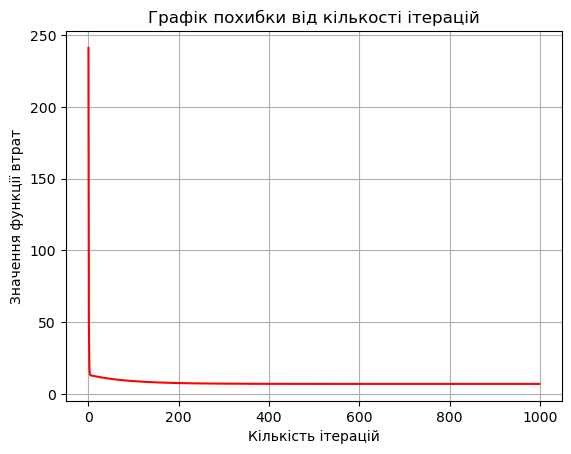

In [37]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    k = 0
    b = 0
    loss_values = []

    for _ in range(n_iter):
        y_pred = k * x + b
        loss = np.mean((y_pred - y) ** 2)
        loss_values.append(loss)

        dk = np.sum(2 * (y_pred - y) * x) / x.size
        db = np.sum(2 * (y_pred - y)) / x.size

        k -= learning_rate * dk
        b -= learning_rate * db

    return k, b, loss_values

def plot_loss_curve(loss_values):
    plt.plot(range(len(loss_values)), loss_values, color='red')
    plt.xlabel('Кількість ітерацій')
    plt.ylabel('Значення функції втрат')
    plt.title('Графік похибки від кількості ітерацій')
    plt.grid(True)
    plt.show()

learning_rate = 0.01
n_iter = 1000

k_hat, b_hat, loss_values = gradient_descent(x, y, learning_rate, n_iter)

plot_loss_curve(loss_values)


4. Порівняйте отримані результати з результатами попереднього завдання

Оцінки параметрів за методом градієнтного спуску:
k_hat = 2.0065561844982156
b_hat = 5.002582001963767

Оцінки параметрів за методом найменших квадратів:
k_hat_ls = 2.0045748207202663
b_hat_ls = 5.015281476509031


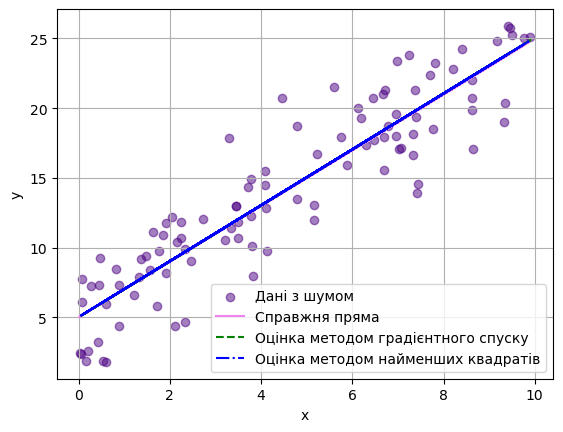

In [38]:
k_hat_ls, b_hat_ls = least_squares_method(x, y)

print("Оцінки параметрів за методом градієнтного спуску:")
print("k_hat =", k_hat)
print("b_hat =", b_hat)
print()
print("Оцінки параметрів за методом найменших квадратів:")
print("k_hat_ls =", k_hat_ls)
print("b_hat_ls =", b_hat_ls)
plt.scatter(x, y, label='Дані з шумом', color='indigo', alpha=0.5)

plt.plot(x, k * x + b, color='violet', label='Справжня пряма')

plt.plot(x, k_hat * x + b_hat, color='green', linestyle='--', label='Оцінка методом градієнтного спуску')

plt.plot(x, k_hat_ls * x + b_hat_ls, color='blue', linestyle='-.', label='Оцінка методом найменших квадратів')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
